In [1]:
# importing the libraries

import pandas as pd
import numpy as np

In [2]:
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries for data and statistical modeling
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import pearsonr,spearmanr,f_oneway,chi2_contingency

In [4]:
# customize my visuals
sns.set_style('darkgrid')
sns.set_palette('husl')

In [5]:
hr = pd.read_csv('HR Employee Attrition.csv')

In [7]:
hr.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [8]:
hr.shape

(1470, 35)

In [9]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
hr.info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# Drop columns multiple column 
hr = hr.drop(['EmployeeCount','EmployeeNumber','DailyRate','StandardHours','StockOptionLevel'], axis=1)

In [14]:
hr.info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [15]:
hr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,12,3,4,6,3,3,2,2,2,2


## Data Visualisation
Subplots of Demographic Variables Subplots of scatter chart Distribution plot for continous variables

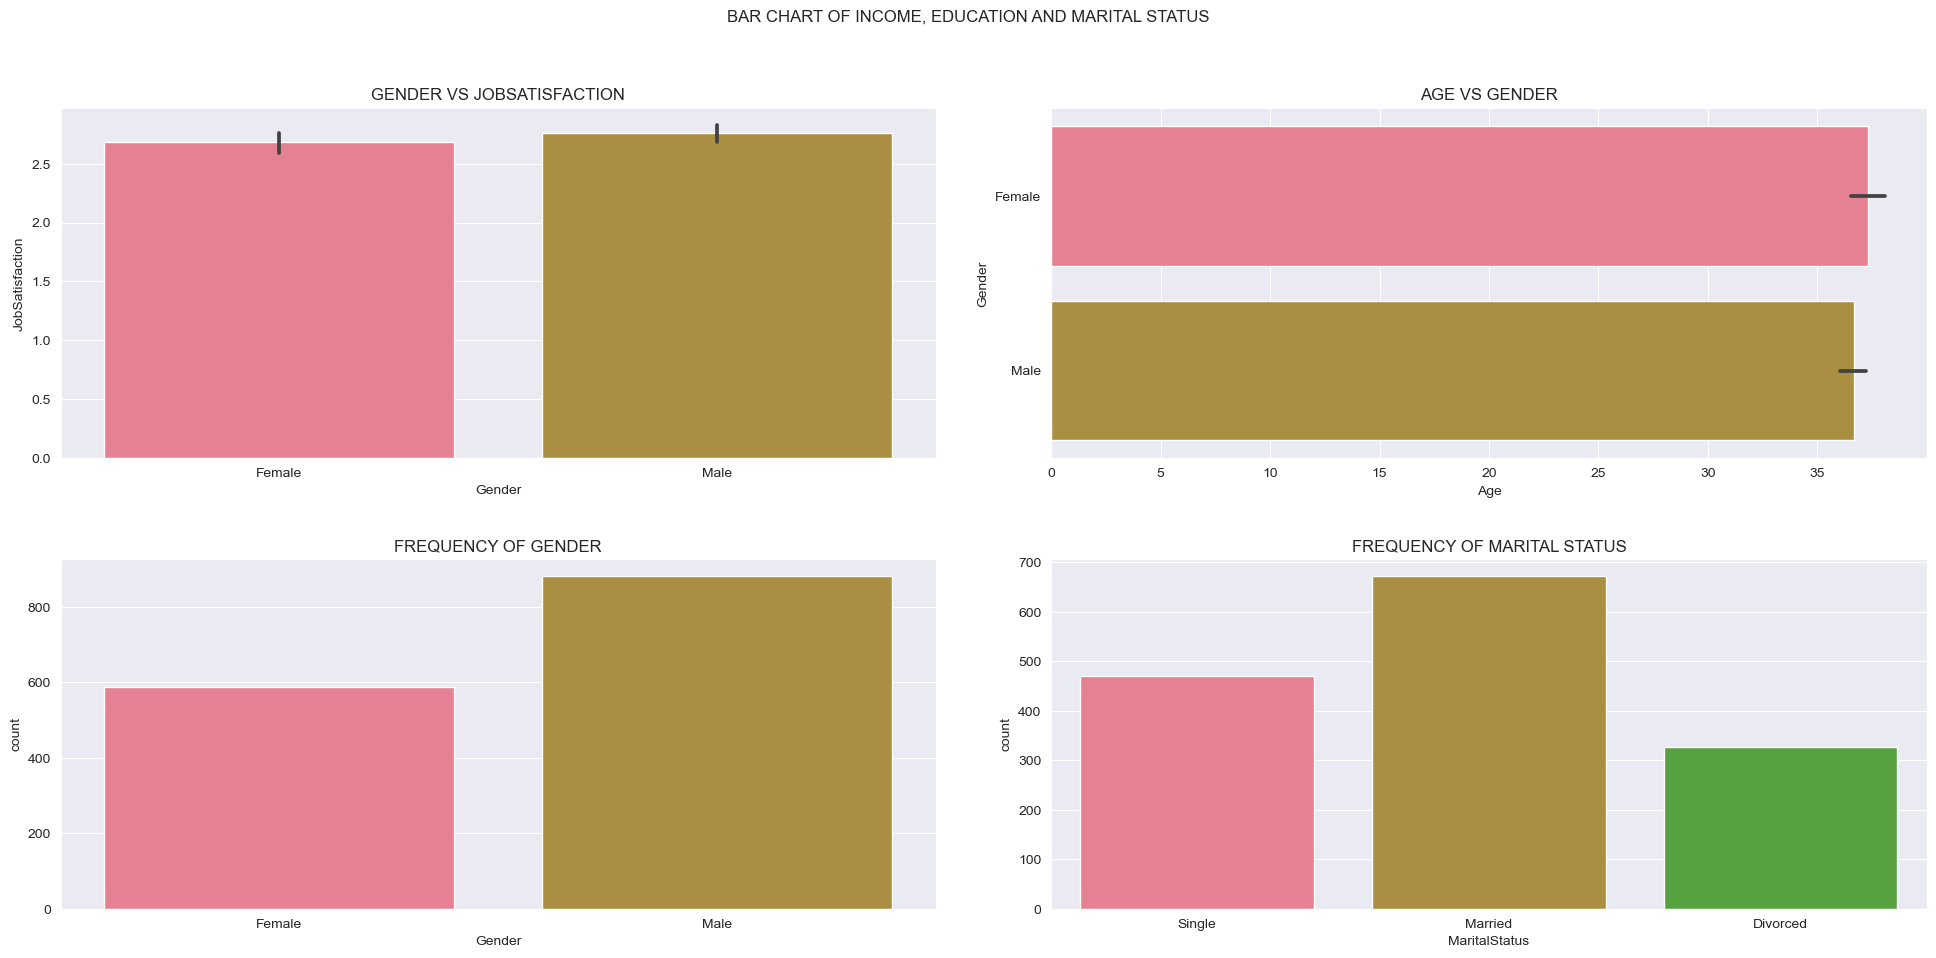

In [16]:
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= hr, x = 'Gender', y = 'JobSatisfaction', ax=axes[0,0])
sns.barplot(data= hr, x = 'Age', y = 'Gender', ax=axes[0,1])
sns.countplot(data= hr, x = 'Gender', ax=axes[1,0])
sns.countplot(data= hr, x = 'MaritalStatus', ax=axes[1,1])

axes[0,0].set_title('GENDER VS JOBSATISFACTION')
axes[0,1].set_title('AGE VS GENDER')
axes[1,0].set_title('FREQUENCY OF GENDER')
axes[1,1].set_title('FREQUENCY OF MARITAL STATUS')

plt.suptitle('BAR CHART OF INCOME, EDUCATION AND MARITAL STATUS')

fig.tight_layout(pad= 3)


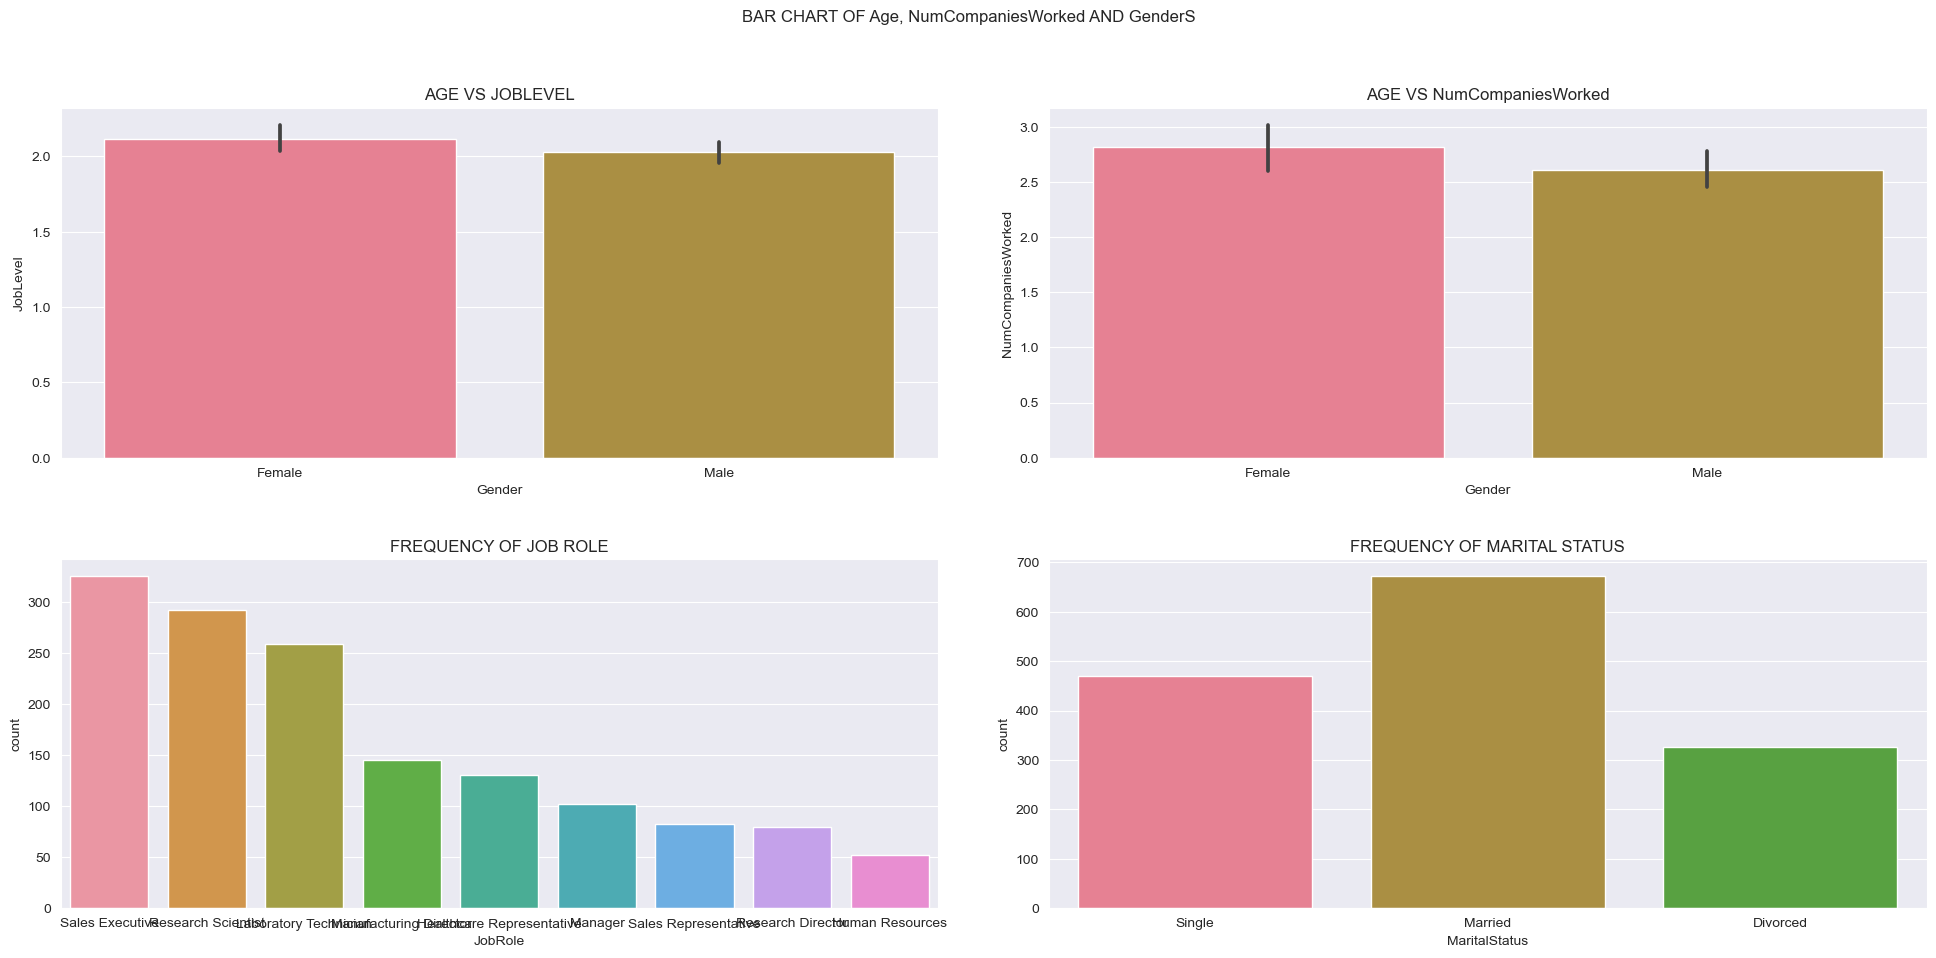

In [17]:
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= hr, x = 'Gender', y = 'JobLevel', ax=axes[0,0])
sns.barplot(data= hr, x = 'Gender', y = 'NumCompaniesWorked', ax=axes[0,1])
sns.countplot(data= hr, x = 'JobRole', ax=axes[1,0])
sns.countplot(data= hr, x = 'MaritalStatus', ax=axes[1,1])

axes[0,0].set_title('AGE VS JOBLEVEL')
axes[0,1].set_title('AGE VS NumCompaniesWorked')
axes[1,0].set_title('FREQUENCY OF JOB ROLE')
axes[1,1].set_title('FREQUENCY OF MARITAL STATUS')

plt.suptitle('BAR CHART OF Age, NumCompaniesWorked AND GenderS')

fig.tight_layout(pad= 3)

Text(0.5, 0.98, 'HiSTOGRAM OF WORKLIFE BALANCE AND EDUCATION FIELD')

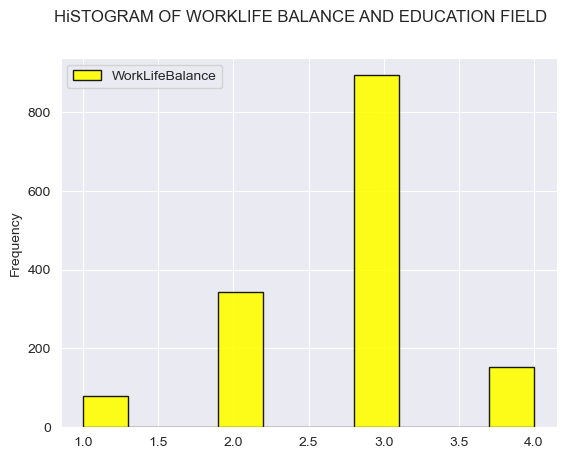

In [19]:
#codeblock
hr[["EducationField","WorkLifeBalance"]].plot(kind="hist",bins=10, color='yellow',edgecolor='black',alpha=0.9)
plt.suptitle('HiSTOGRAM OF WORKLIFE BALANCE AND EDUCATION FIELD')

Text(0.5, 0.98, 'HiSTOGRAM OF YEARS AT COMPANY AND JOBLEVEL')

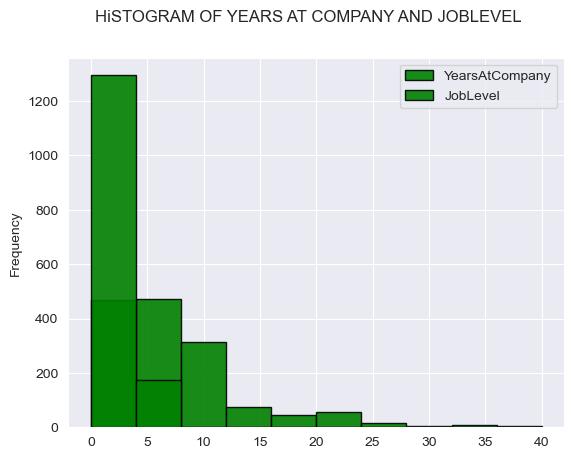

In [20]:
#codeblock
hr[["YearsAtCompany","JobLevel"]].plot(kind="hist",bins=10, color='green',edgecolor='black',alpha=0.9)
plt.suptitle('HiSTOGRAM OF YEARS AT COMPANY AND JOBLEVEL')

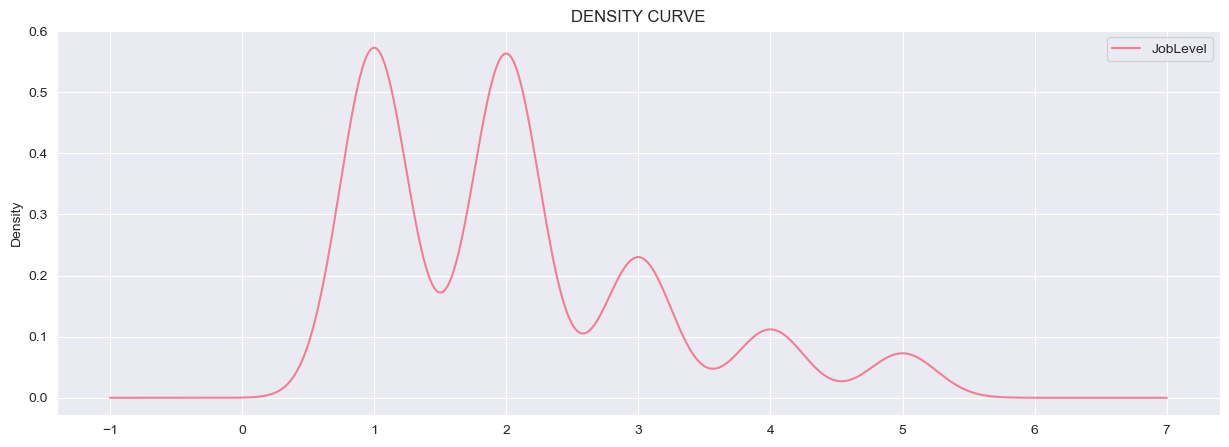

In [21]:
#codeblock
hr[["JobLevel","EducationField"]].plot(kind="kde", alpha=0.9, figsize=(15,5))
plt.title('DENSITY CURVE')
plt.xlabel=("Education")
plt.ylabel=("JobLevel")
plt.legend(loc=1)

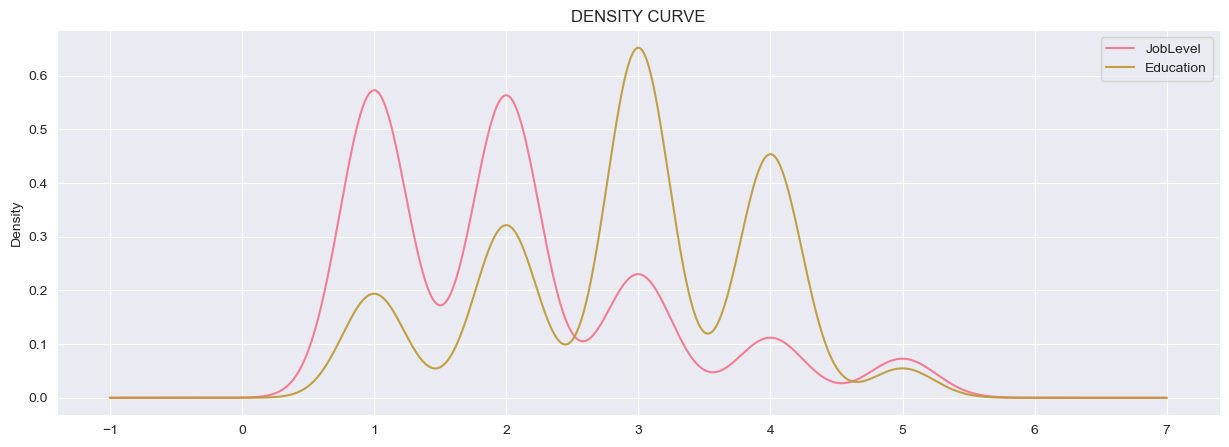

In [22]:
#codeblock
hr[["JobLevel","Education"]].plot(kind="kde", alpha=0.9, figsize=(15,5))
plt.title('DENSITY CURVE')
plt.xlabel=("Education")
plt.ylabel=("JobLevel")
plt.legend(loc=1)

<Axes: >

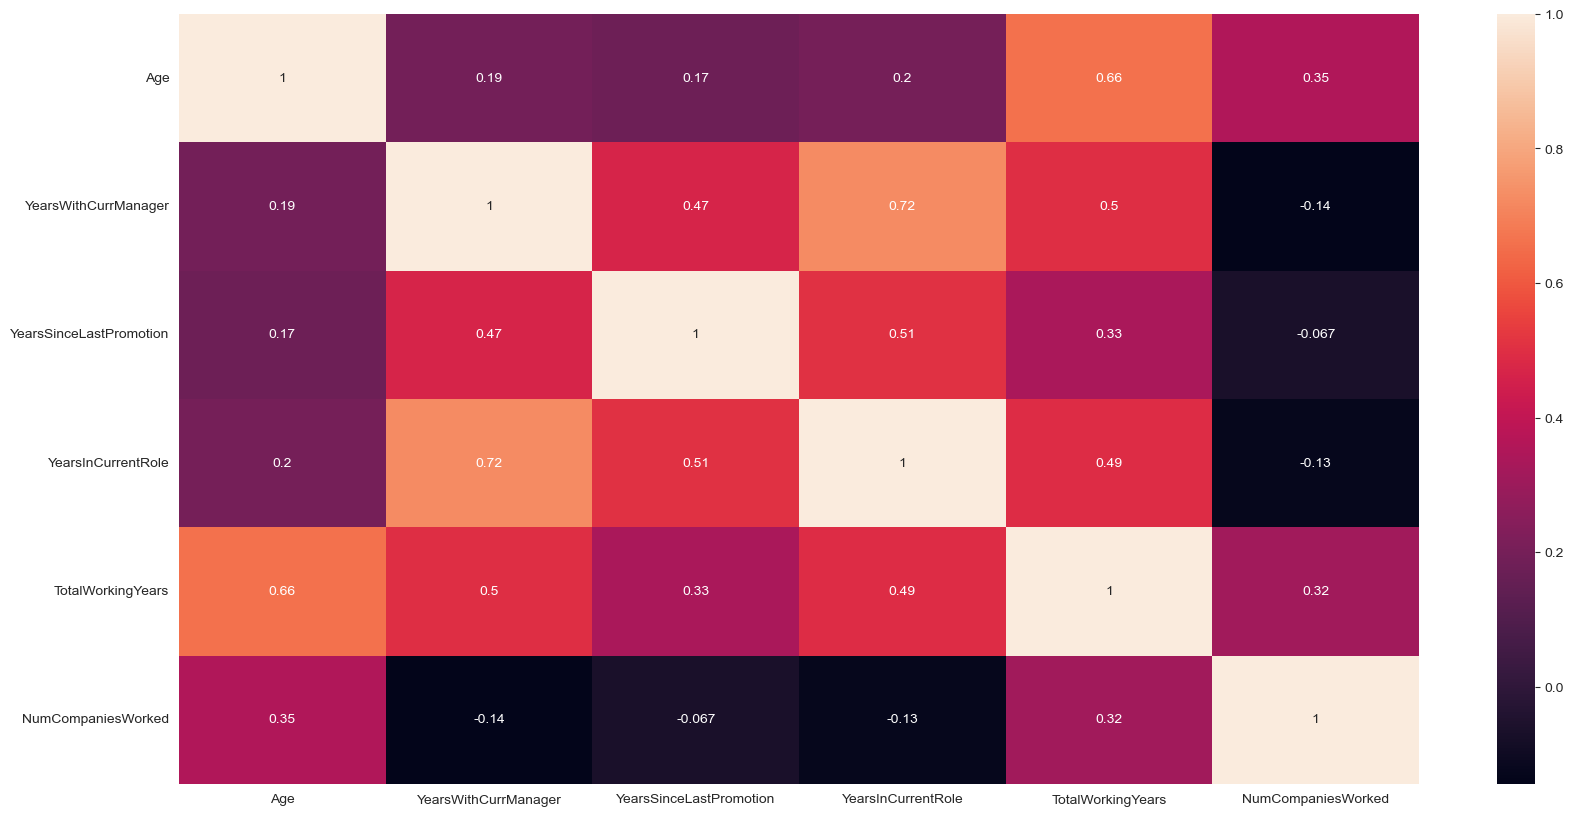

In [23]:
# inspecting correlation matrix 

corr_matrix = hr[['Age','YearsWithCurrManager', 'YearsSinceLastPromotion',
       'YearsInCurrentRole', 'TotalWorkingYears', 'NumCompaniesWorked']].corr(method='spearman')

fig = plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot= True)

<Axes: >

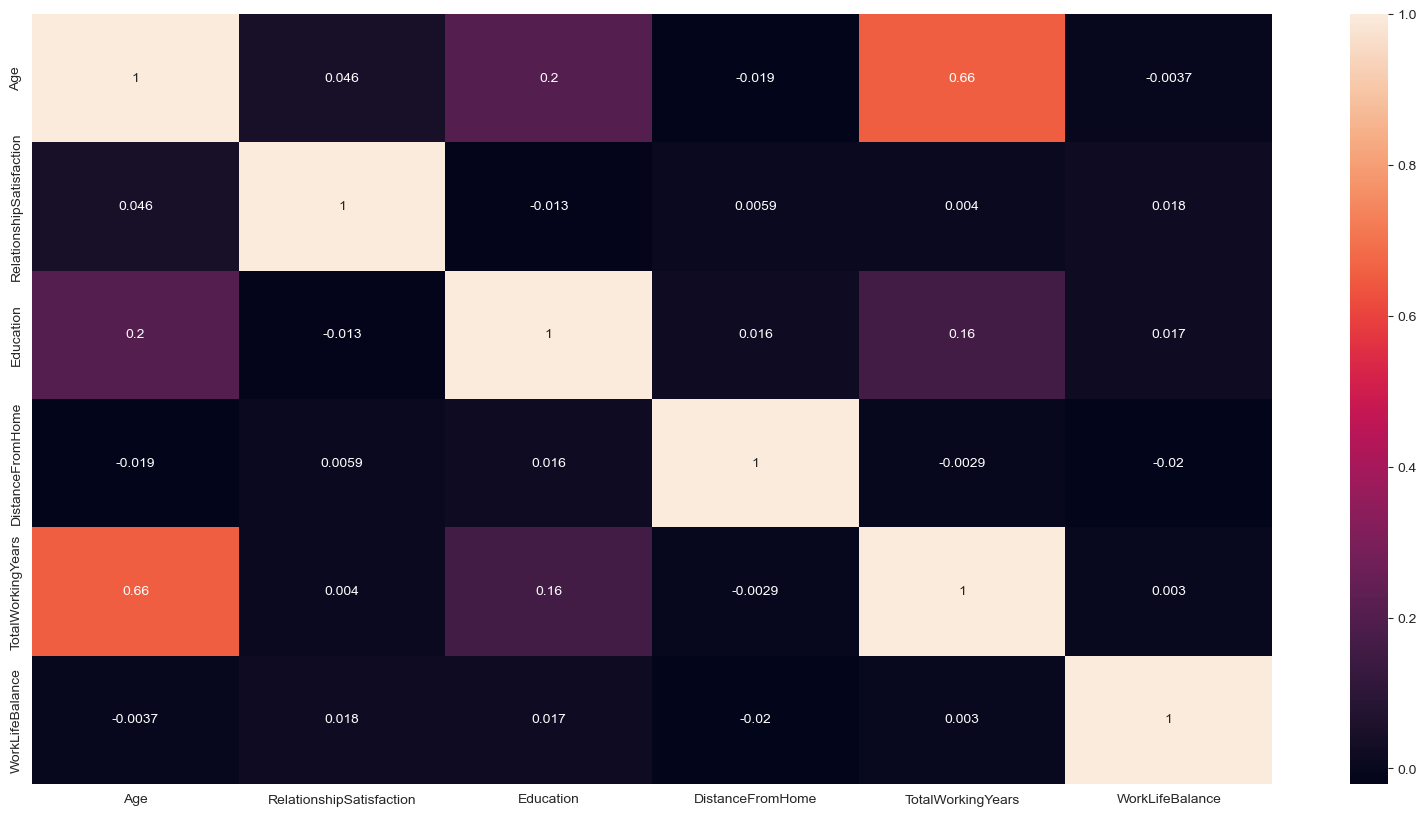

In [24]:
corr_matrix = hr[['Age','RelationshipSatisfaction', 'Education',
       'DistanceFromHome', 'TotalWorkingYears', 'WorkLifeBalance']].corr(method='spearman')

fig = plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot= True)

Text(0.5, 0.98, 'PIECHART OF MARITAL STATUS')

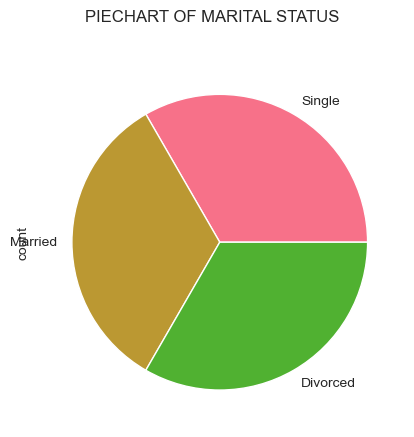

In [29]:
hr = pd.DataFrame({'MaritalStatus': ['Single', 'Married', 
                                   'Divorced']})
hr['MaritalStatus'].value_counts().plot.pie()
plt.suptitle('PIECHART OF MARITAL STATUS')

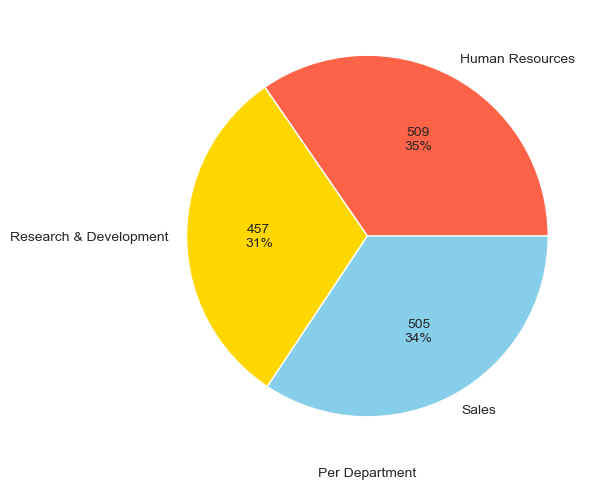

In [32]:
hr = pd.DataFrame({'Department': ['Sales','Human Resources','Research & Development']})
def label_function(val):
    return f'{val / 100 * len(hr):.0f}\n{val:.0f}%'

N = 1471
hr = pd.DataFrame({'Department': np.random.choice(['Sales', 'Human Resources', 'Research & Development'], N)})

fig, (ax1) = plt.subplots(figsize=(10, 5))

hr.groupby('Department').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)

ax1.set_xlabel('Per Department', size=10)
plt.tight_layout()
plt.show()

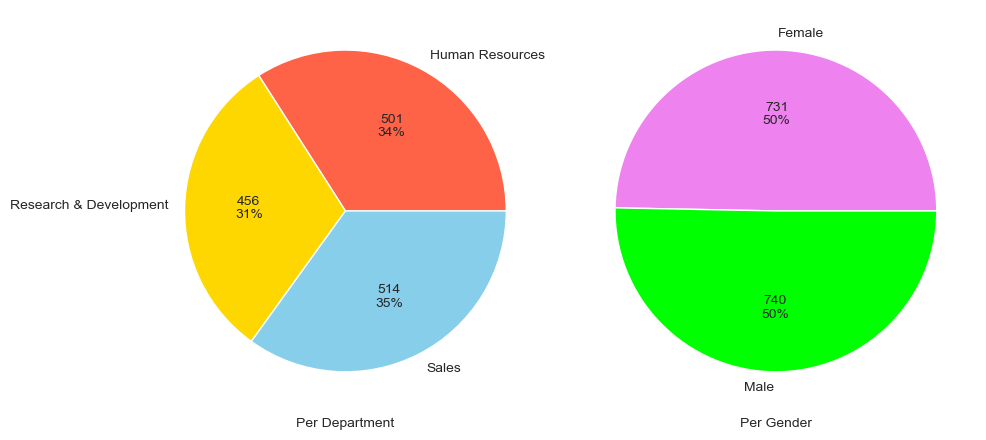

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def label_function(val):
    return f'{val / 100 * len(hr):.0f}\n{val:.0f}%'

N = 1471
hr = pd.DataFrame({'Department': np.random.choice(['Sales', 'Human Resources', 'Research & Development'], N),
                   'Gender': np.random.choice(['Male', 'Female'], N)})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

hr.groupby('Department').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
hr.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['violet', 'lime'], ax=ax2)
ax1.set_xlabel('Per Department', size=10)
ax2.set_xlabel('Per Gender', size=10)
plt.tight_layout()
plt.show()

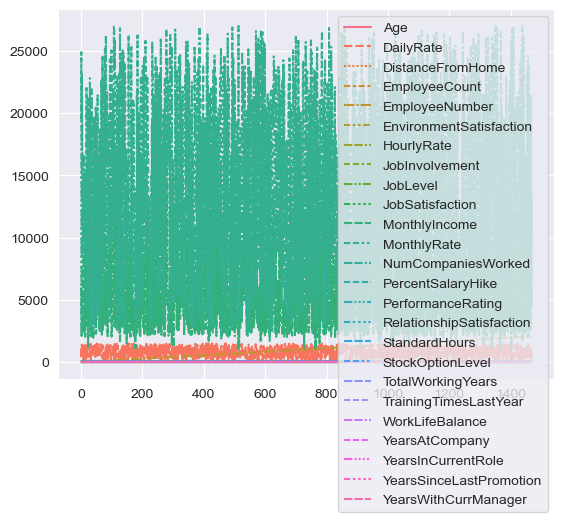

In [40]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database


# using only data attribute
sns.lineplot(data=hr.drop(['Education'], axis=1))
plt.show()


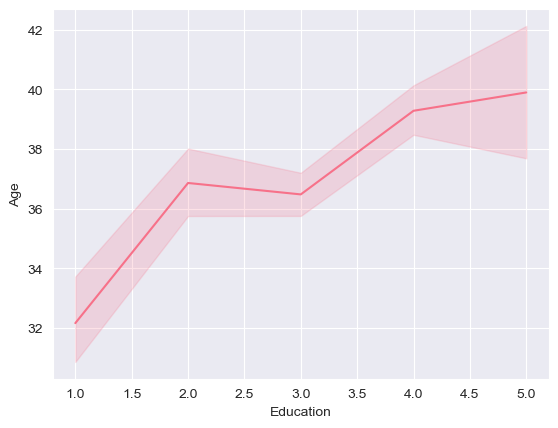

In [41]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
hr = pd.read_csv('HR Employee Attrition.csv')

sns.lineplot(x='Education', y='Age', data=hr)
plt.show()

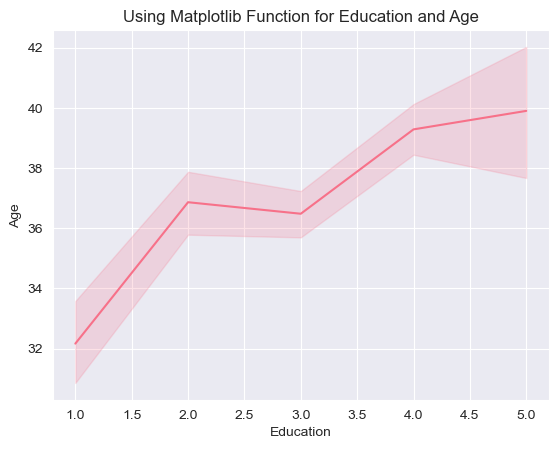

In [42]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
hr = pd.read_csv('HR Employee Attrition.csv')


# draw lineplot
sns.lineplot(x="Education", y="Age", data=hr)

# setting the title using Matplotlib
plt.title('Using Matplotlib Function for Education and Age')

plt.show()


In [43]:
def get_chart(x, y, dim, title):
    
    fig, axes = plt.subplots(dim[0],dim[1], figsize = (20,10))
    sns.barplot(data= hr, x = x[0], y = y[0], ax=axes[0,0])
    sns.barplot(data= hr, x = x[1], y = y[0], ax=axes[0,1])
    sns.barplot(data= hr, x = x[0], y = y[1], ax=axes[1,0])
    sns.barplot(data= hr, x = x[1], y = y[1], ax=axes[1,1])

    axes[0,0].set_title(f'{x[0].upper()} VS {y[0].upper()}')
    axes[0,1].set_title(f'{x[1].upper()} VS {y[0].upper()}')
    axes[1,0].set_title(f'{x[0].upper()} VS {y[1].upper()}')
    axes[1,1].set_title(f'{x[1].upper()} VS {y[1].upper()}')
    
    fig.tight_layout(pad=3)


    plt.suptitle(title)

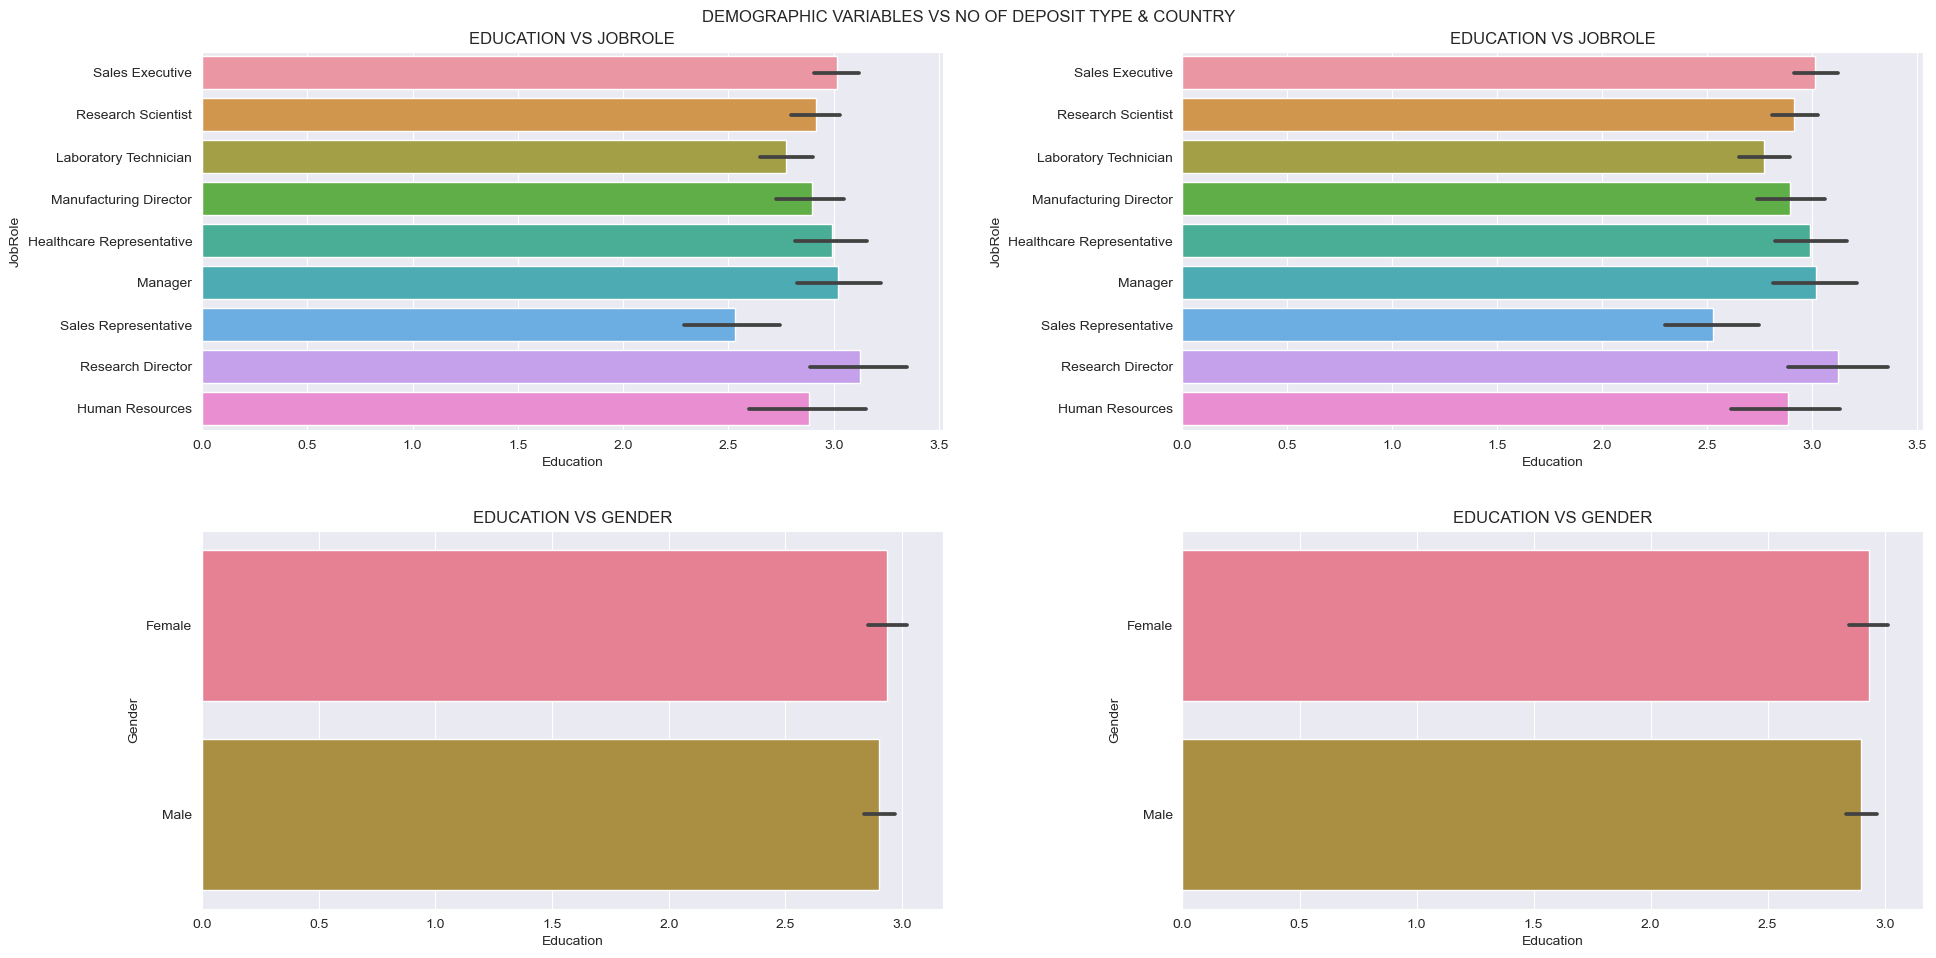

In [45]:
get_chart(x = ['Education', 'Education'],
          y = ['JobRole', 'Gender'],
          dim= [2,2],
          title= 'DEMOGRAPHIC VARIABLES VS Education & Gender')

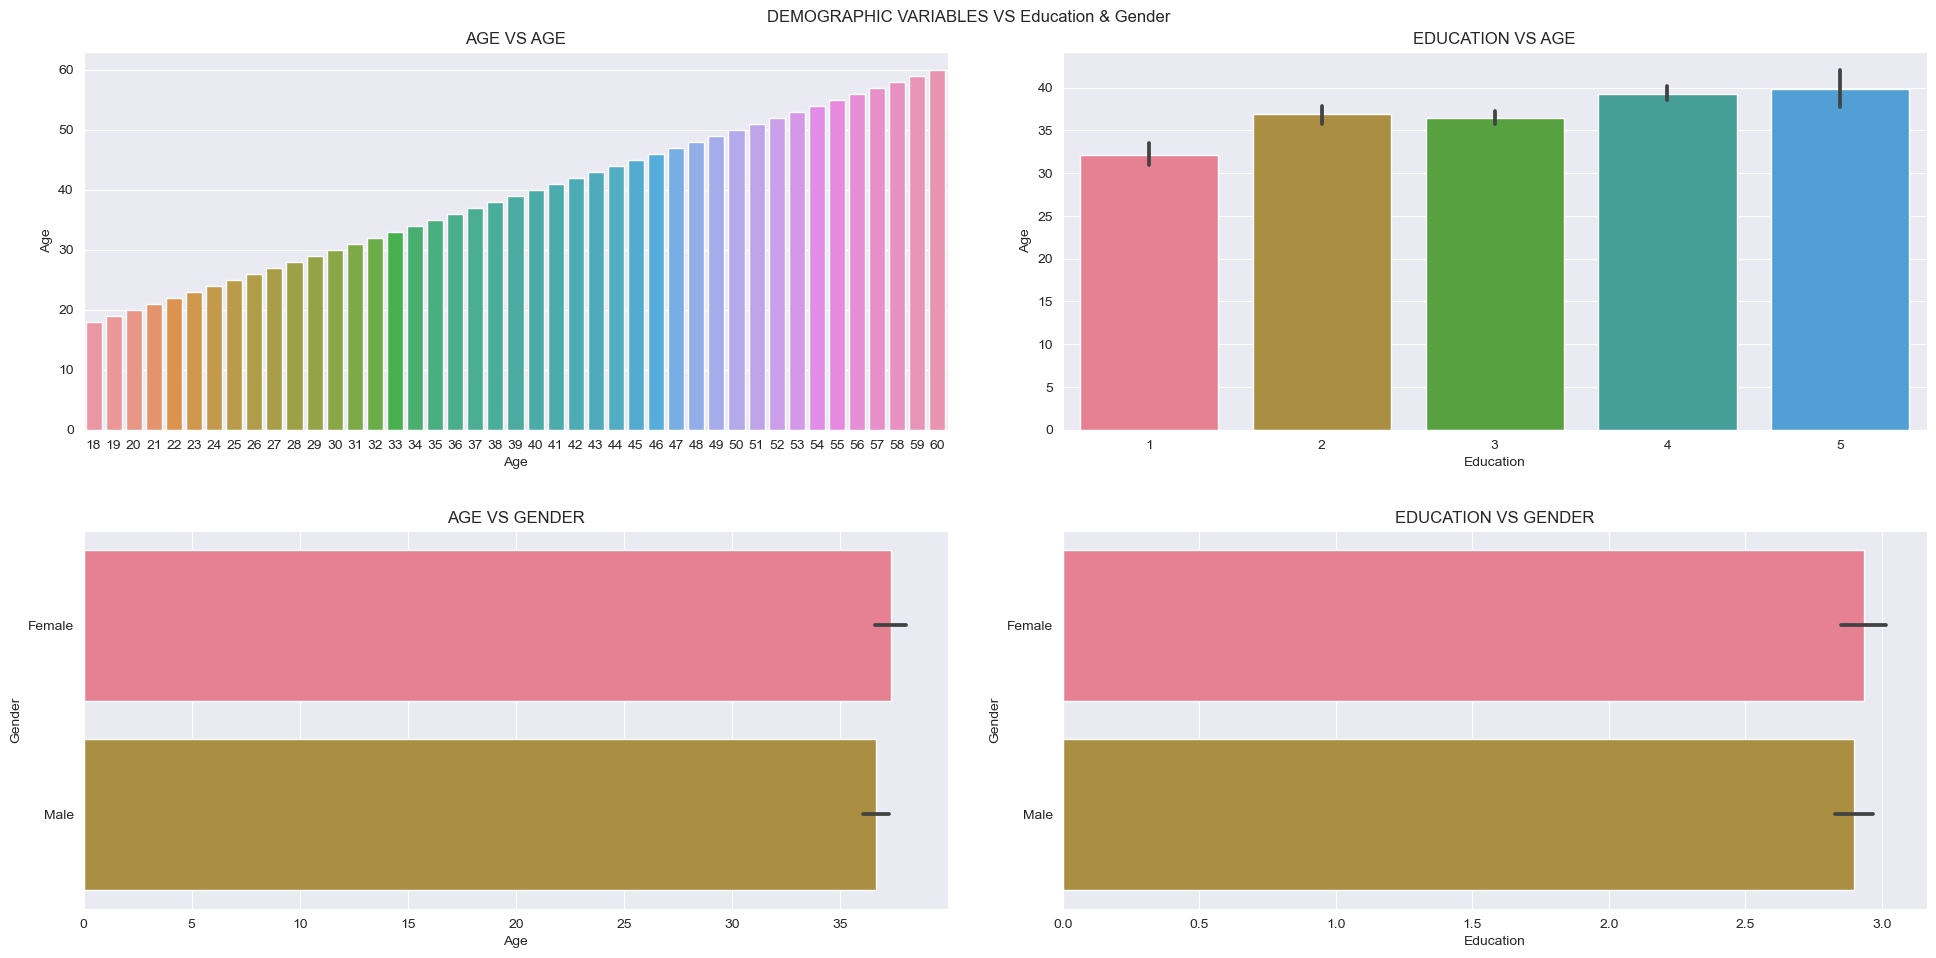

In [46]:
get_chart(x = ['Age', 'Education'],
          y = ['Age', 'Gender'],
          dim= [2,2],
          title= 'DEMOGRAPHIC VARIABLES VS Education & Gender')